In [22]:
#Import necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
warnings.filterwarnings("ignore")

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [4]:
data = pd.read_csv('train.csv')
data = data.drop('Id', axis = 1)

In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
numerical_features   = list()
categorical_features = list()
for elm in data.columns:
    if data[elm].dtype == 'object':
        print(elm," ",data[elm].unique())
        categorical_features.append(elm)
    else:
        numerical_features.append(elm)
        pass
    pass
pass

MSZoning   ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street   ['Pave' 'Grvl']
Alley   [nan 'Grvl' 'Pave']
LotShape   ['Reg' 'IR1' 'IR2' 'IR3']
LandContour   ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities   ['AllPub' 'NoSeWa']
LotConfig   ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope   ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1   ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2   ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType   ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle   ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle   ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl   ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Ex

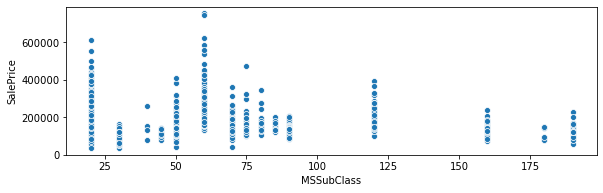

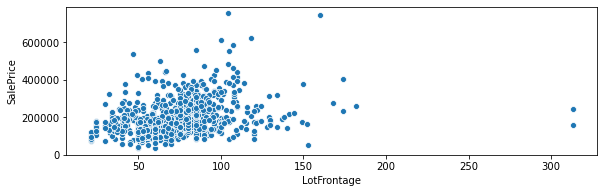

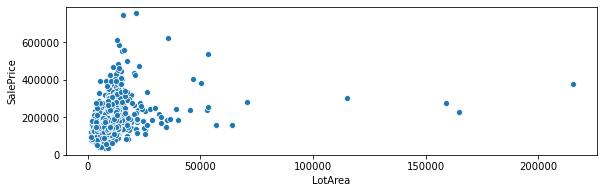

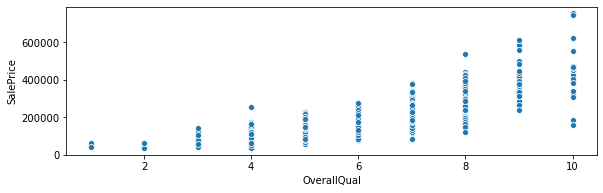

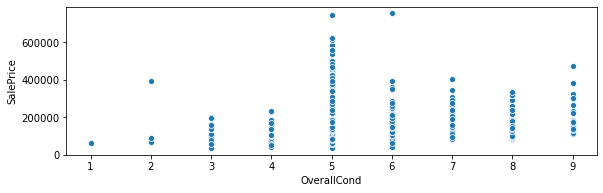

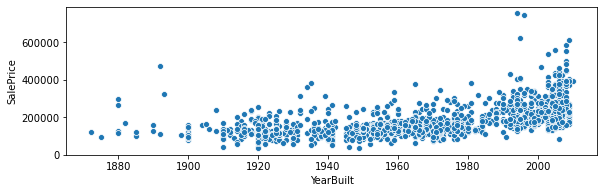

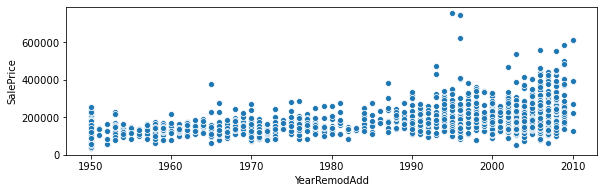

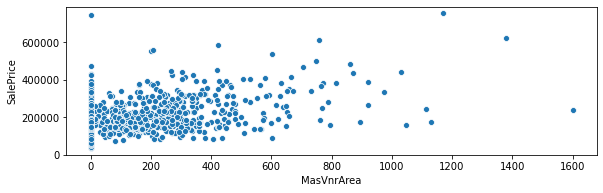

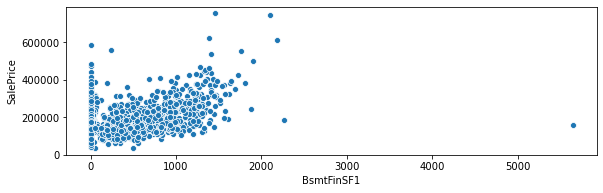

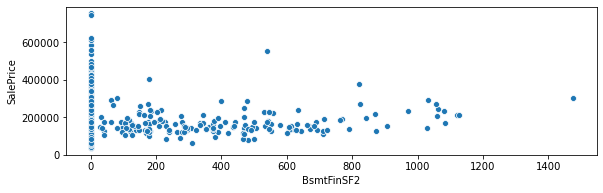

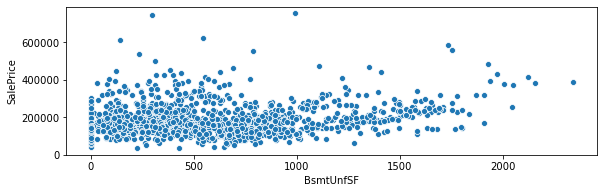

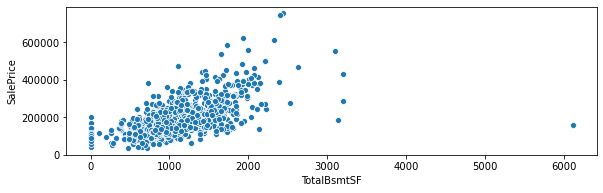

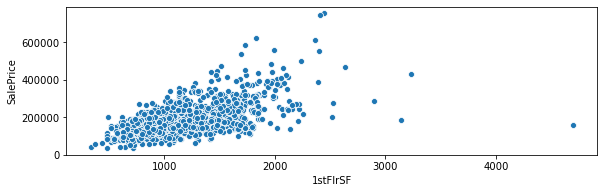

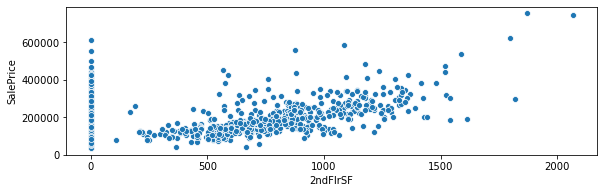

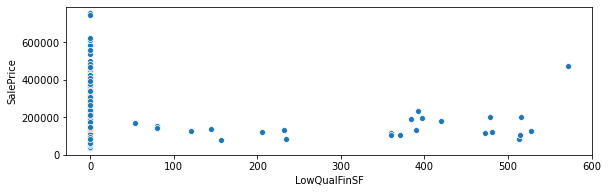

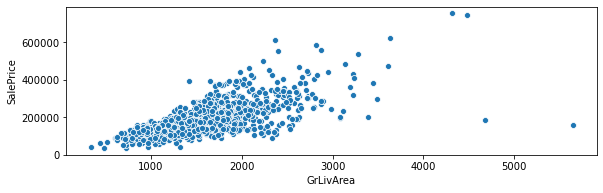

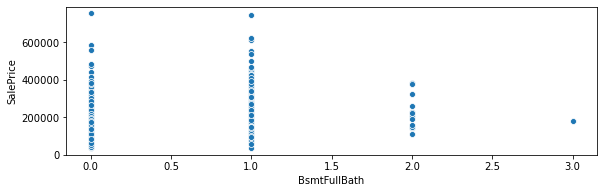

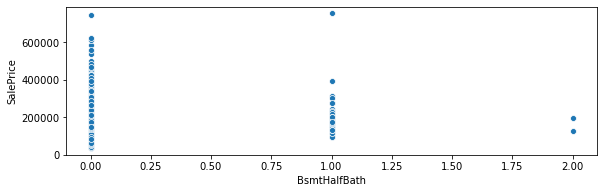

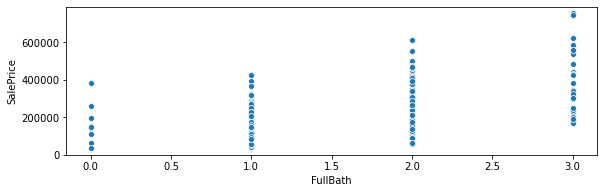

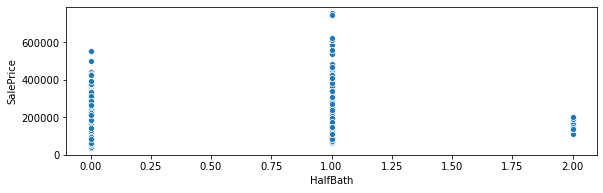

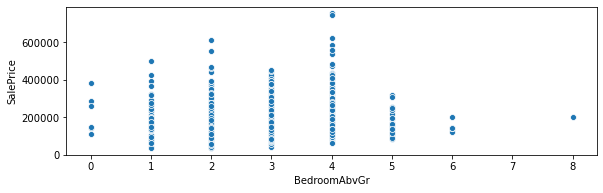

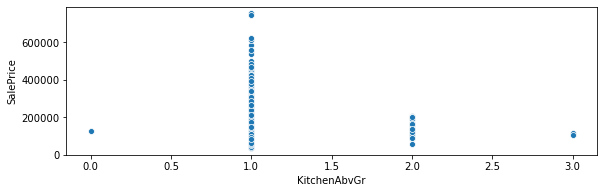

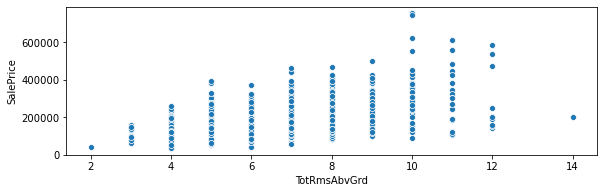

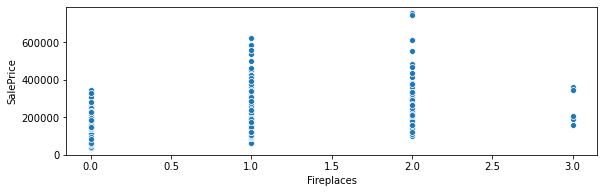

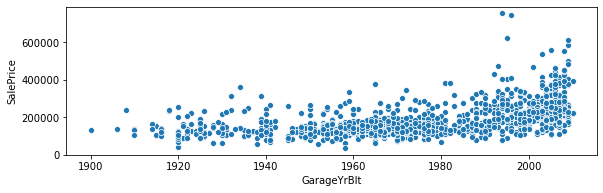

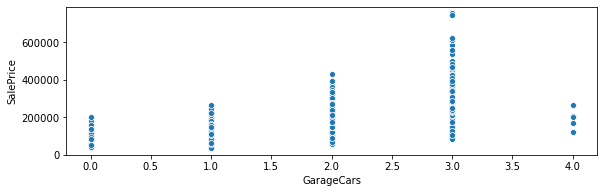

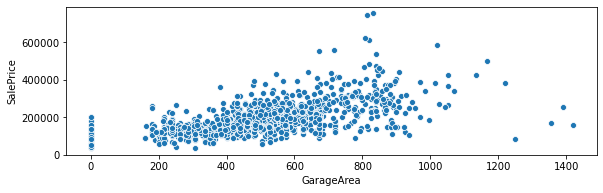

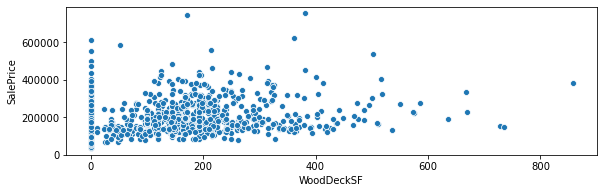

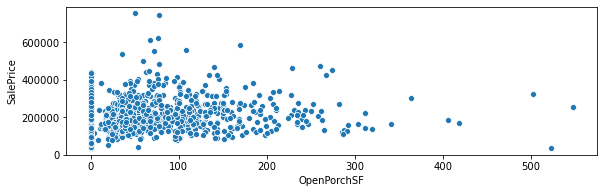

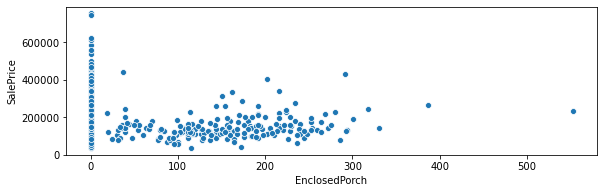

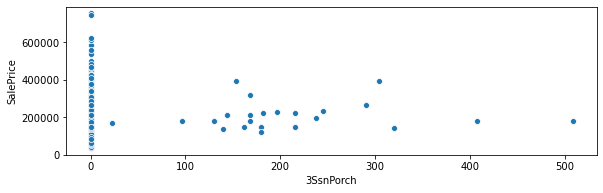

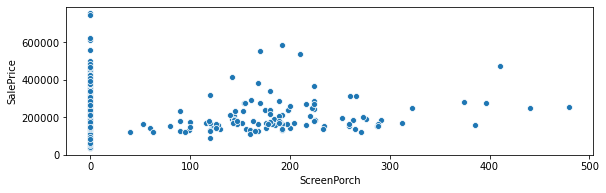

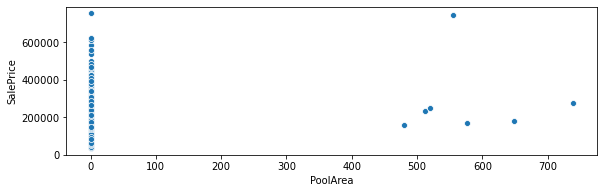

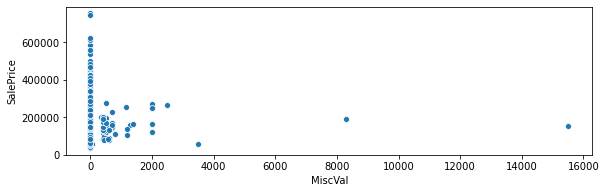

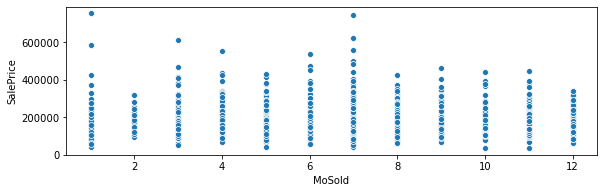

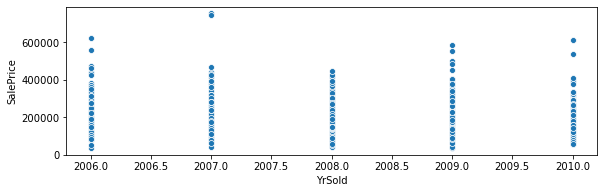

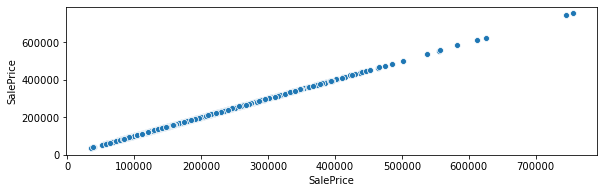

In [7]:
for elm in numerical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.scatterplot(data[elm], data['SalePrice'])
    plt.tight_layout()
    pass
pass

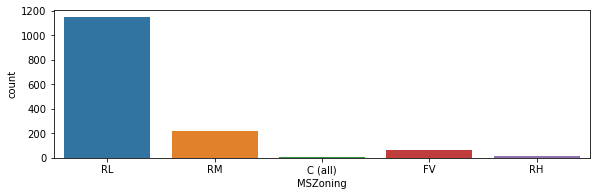

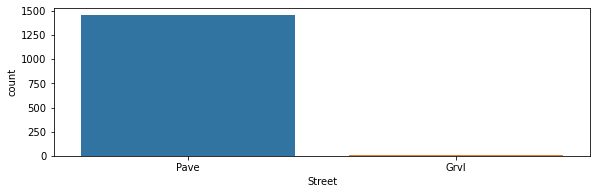

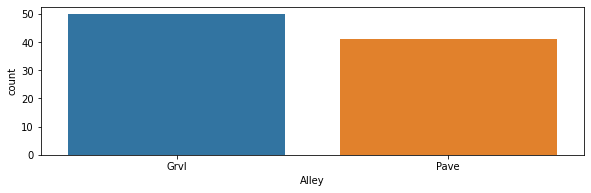

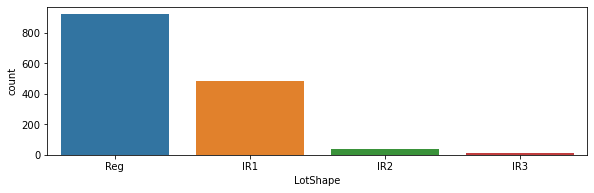

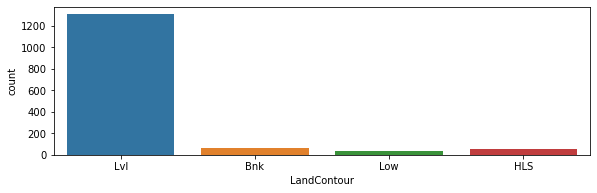

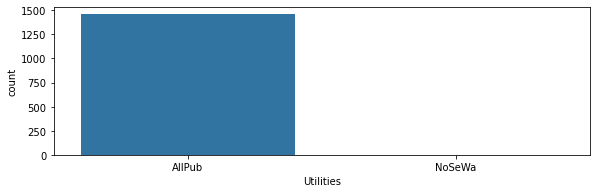

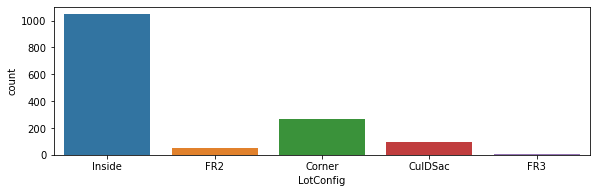

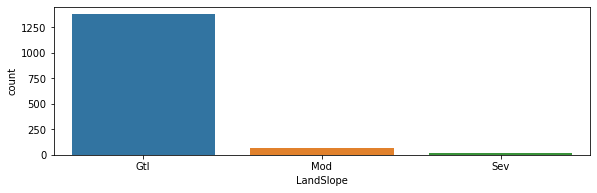

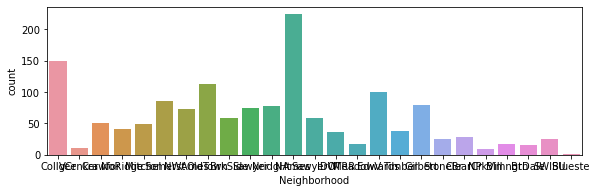

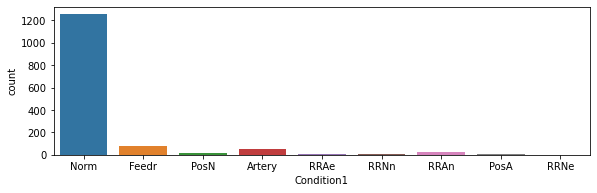

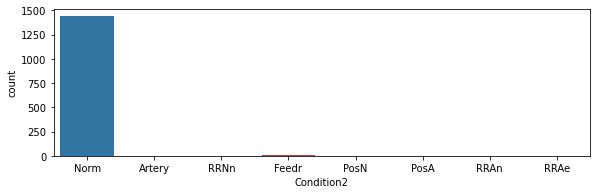

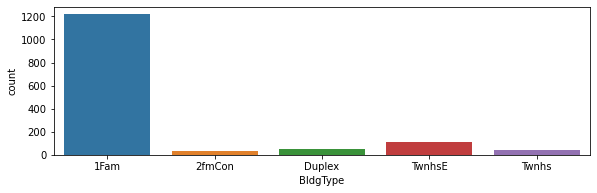

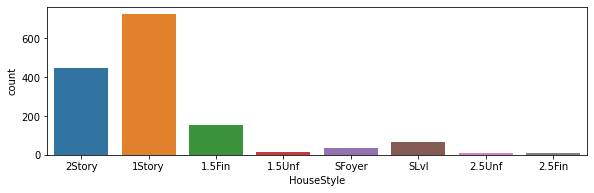

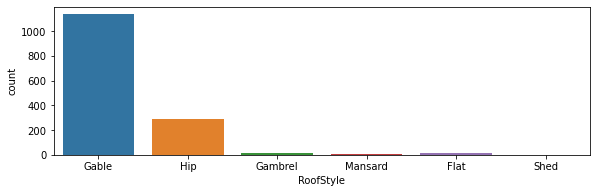

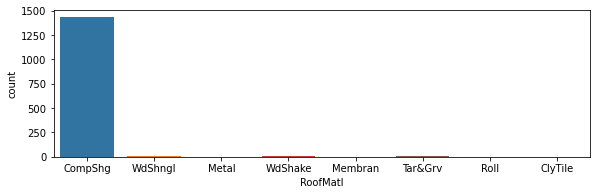

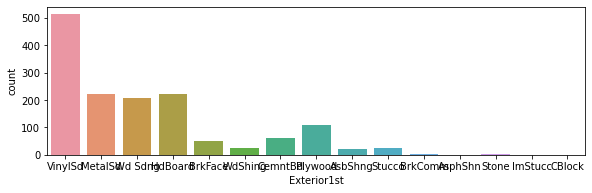

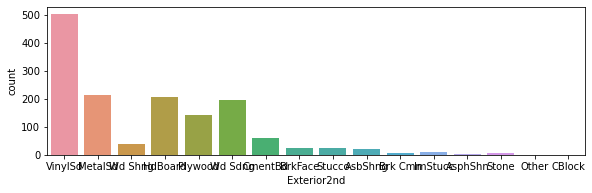

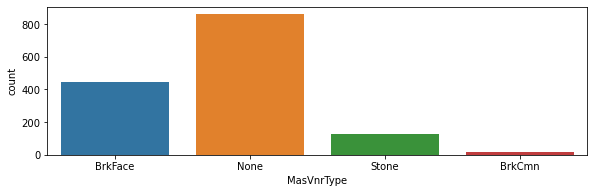

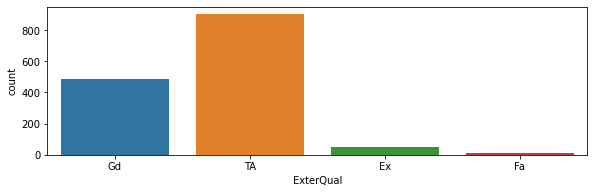

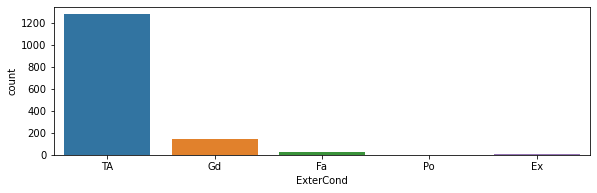

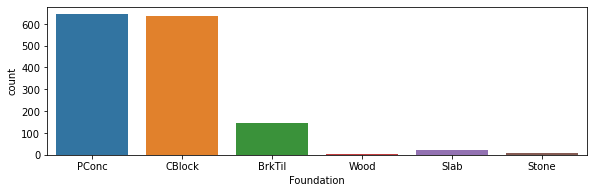

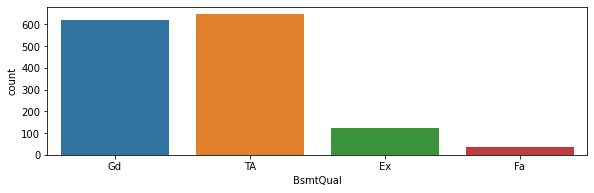

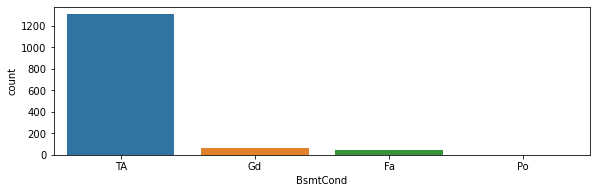

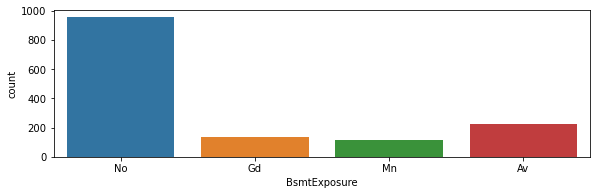

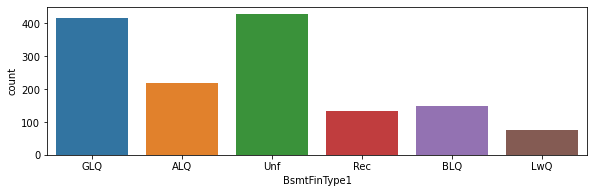

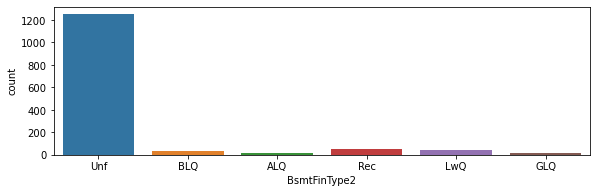

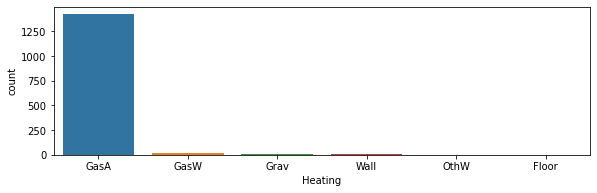

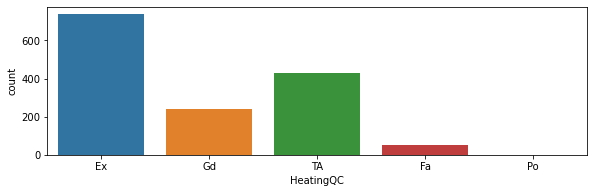

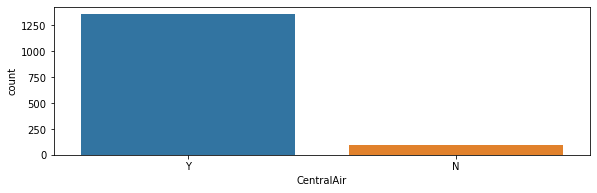

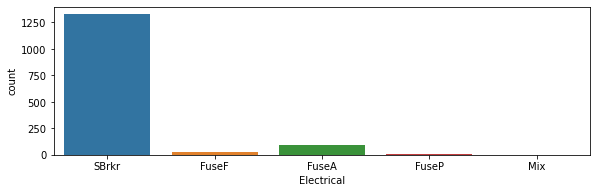

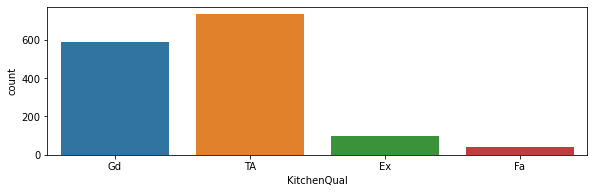

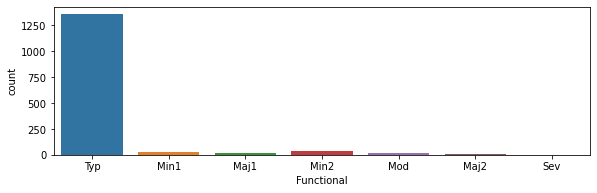

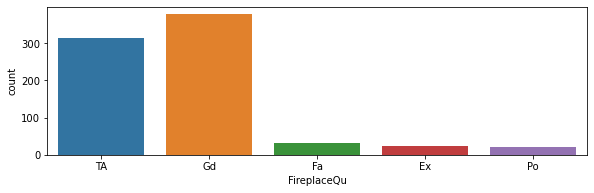

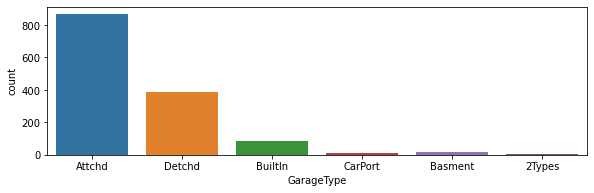

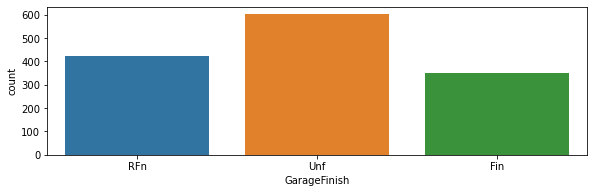

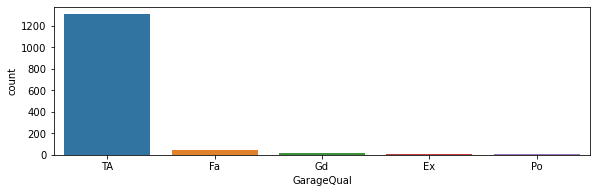

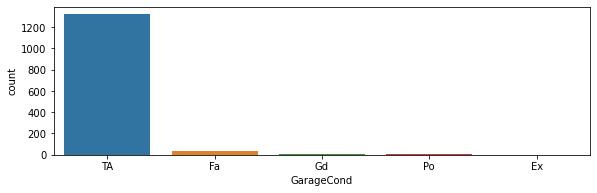

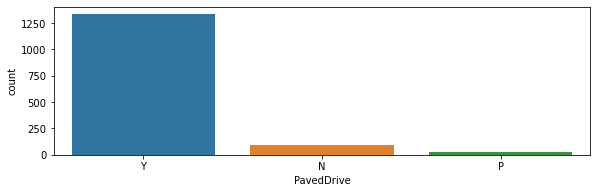

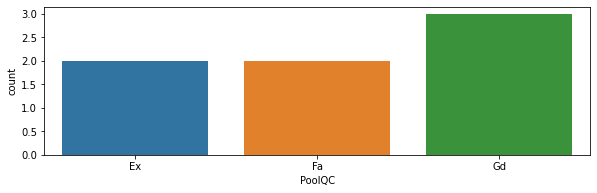

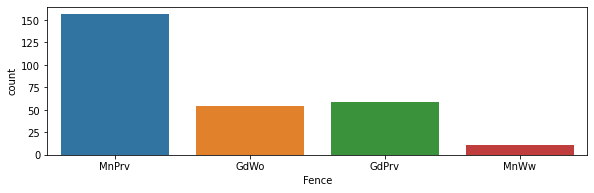

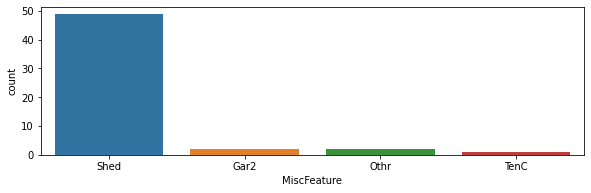

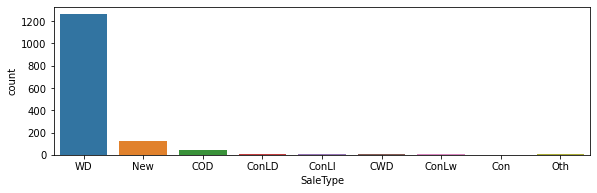

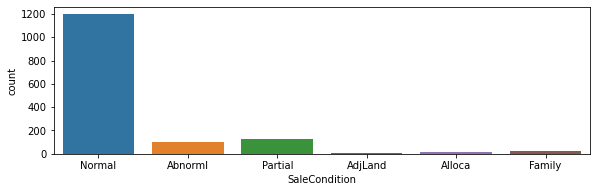

In [8]:
for elm in categorical_features:
    fig = plt.figure(figsize=(16,5))
    fig.add_subplot(2,2,1)
    sns.countplot(data[elm])
    plt.tight_layout()
    pass
pass

In [9]:
features = ['LotArea', 'YearBuilt', 'YearRemodAdd'
           , 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

In [10]:
X = data[features]
y = data['SalePrice']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [15]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [16]:
print(Linear_Regression.intercept_)
print(Linear_Regression.coef_)

181622.21960731855
[ 4.15910849e+03  1.67092821e+04  1.24882180e+04 -1.07093154e+04
  2.80466902e+04 -1.33881810e+18 -1.56485810e+18 -1.63896028e+17
  1.83627127e+18]


In [17]:
y_pred = Linear_Regression.predict(X_test)

coeff_df = pd.DataFrame({"features" : features, "Coefficient" : Linear_Regression.coef_ }) 
coeff_df

,features,Coefficient
0,LotArea,4.159108e+03
1,YearBuilt,1.670928e+04
2,YearRemodAdd,1.248822e+04
3,BsmtUnfSF,-1.070932e+04
4,TotalBsmtSF,2.804669e+04
5,1stFlrSF,-1.338818e+18
6,2ndFlrSF,-1.564858e+18
7,LowQualFinSF,-1.638960e+17
8,GrLivArea,1.836271e+18


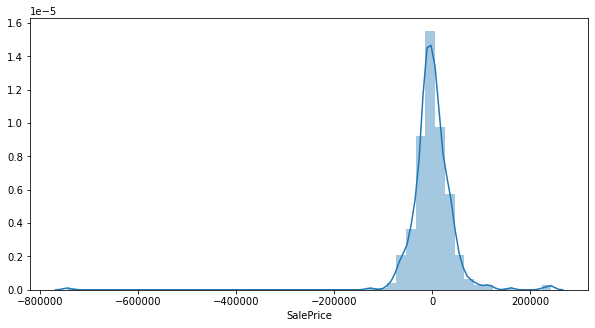

In [18]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 27049.892842666275
MSE: 2570730056.03546
RMSE: 50702.36736125306
VarScore: 0.5765749458832634


In [23]:
model = Sequential()
model.add(Dense(9,  activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

NameError: name 'Sequential' is not defined

In [24]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

NameError: name 'model' is not defined

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))